**Grade:** 100%

**Comments:** Fantastic work, Susan! There were a few minor things I noticed (see my comments below), but overall you did a great job on both the code/analysis and your discussion. I particularly liked how you spent time reading the text and how you thought critically about your results. I also appreciate that you noticed some of the oddities that were occuring during data cleaning and that you commented on how they might affect the results. Nice job! 

#Project 4: NLP

##1_PROBLEM DEFINITION

###1.1 Write a Concise Problem Definition for the Project

>PROBLEM: Research a famous person using a traditional dataset and the Wikipedia API to identify 10 people whose overviews are "closest" (in a Natural Language Processing [NLP] sense) to that person. Perform sentiment calculations for and compare results of both research methods.

This is a categorization problem using the k-Nearest Neighbors (KNN) algorithm.

GOALS: PART 1
1. Choose one person from the traditional dataset and output the 10 other people who's overview are "closest" to the person in a Natural Language Processing sense.
1. Output the sentiment of the overview of the person.

GOALS: PART 2
1. For that Wikipedia page determine the sentiment of the entire page.
1. Print out the Wikipedia article.
1. Collect the Wikipedia pages from the 10 nearest neighbors in Step 1).
1. Determine the nearness ranking of these 10 to your main subject based on their entire Wikipedia page.
1. Compare the nearest ranking from Step 1 with the Wikipedia page nearness ranking.


###1.2 Project Requirements

* Use TreeBlob and produce sentiment output
* Use Wikipedia API and produce sentiment output
* Give a presentation on process and results
* Demonstrate use of code based on another student's chosen person 
* Go through the whole data science process and document as such in your Jupyter notebook

###1.3 Considerations for this Project

* Using the Wikipedia API is new 
* Coding for NLP is new
* Running my code with someone else's choices is new

###1.4 Assumptions and Constraints

* The best model to use (at our level of data science) for this problem is KNN with CountVectorizer and TF-IDF.

* The results of data cleaning and the model itself with this data will likely be different than mine when using a more robust model for finding nearest neighbors or using techniques that consider context in their vectorizing.

* The singularizer we used tends to chop off words like 'was' as 'wa', which may be affecting results to a certain degree.

##2_DATA COLLECTION/SOURCES - STEP 1

This step involves identifying (and if needed, moving copies of) the data required for the project.

###2.1 Load the Python Packages Needed for this Project

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from os import path
from PIL import Image
import nltk   # for loop to pull Wiki pages
nltk.download('punkt')    # for loop to pull Wiki pages
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import NearestNeighbors

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


###2.2 Mount Google Drive and Read in the Data File(s)

In [2]:
# mount the drive. This may take a while, depending on the size of the Google My Drive.
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
# load the data into a Pandas dataframe
source_data = pd.read_csv("/drive/My Drive/Cohort_7/Projects/Project 4/Data/Project_4.csv")

###2.3 Roadmap for Step 1

1. Extract the single row for the selected person, Patricia Crowther, and run a sentiment analysis on the 'text' content.

1. Read the entire source_data into a dataframe.
1. The source in 'text' column is already formatted as one long string format (no stops) for each row, so there is no need to perform the TextBlob-related or data cleaning tasks on the data.



STEP 1 - TRADITIONAL DATASET

1. Text has already been "blobbed" so no need to do this.

1. Find row with person of interest -- DONE (in Excel)
1. Perform the BoW using CountVectorization -- DONE
1. Perform the TF-IDF Vectorization (2 steps!) -- DONE
1. Fit NN on df['text'] on the Transformed Vector (TF-IDF) -- DONE
1. Get distances of n_neighbors = 10 -- DONE
1. Get names of those people -- DONE
1. Run and print sentiment analysis on 'text' for person of interest -- DONE

NEXT:
1. Rework code to be able to enter any name in the Famous People index and run the code completely (for Step 1). -- DONE

LATER, IF TIME:
1. Singularize `[:,2]` (all rows, 'text' column).
1. Lemmatize `[:,2]` (all rows, 'text' column).
---

##3_DATA CLEANING - STEP 1

###3.1 Data Cleaning Plan

The dataset (.csv file) for Step 1 is extremely clean so no additional cleaning is necessary. However, initial data examination still needs to be done to understand the structure. If time allows, I will singularize and lemmatize the 'text' column data for the practice.

For Step 2:

* Remove '\n', forbidden characters (symbols)

In [4]:
# make a backup of the source file
people_data = source_data.copy()

CREDIT for code to list names and using the 'index' variable: Tangelia McNair and Nevin Martin 

In [5]:
# Print all of the names in the 'name' column
who_to_choose = people_data['name']
print(who_to_choose.to_string())

0                                            Digby Morrell
1                                           Alfred J. Lewy
2                                            Harpdog Brown
3                                      Franz Rottensteiner
4                                                   G-Enka
5                                            Sam Henderson
6                                            Aaron LaCrate
7                                          Trevor Ferguson
8                                             Grant Nelson
9                                             Cathy Caruth
10                                            Sophie Crumb
11                                           Jenn Ashworth
12                                        Jonathan Hoefler
13                 Anthony Gueterbock, 18th Baron Berkeley
14                                      David Chernushenko
15                                          Joerg Steineck
16                                          Andrew Pinse

In [6]:
# enter a person from the list of names
person = 'Eminem'

In [7]:
# identify the row for the person that was selected
person_index = np.where(people_data == person)
index = person_index[0][0]
index

31657

###3.2 Examine the Dataset

Examine the data to become familiar with structure and identify issues that need to be researched and/or cleaned up. Document recommendations in this section. For NLP, data is largely text files and documents.

In [8]:
# find out the number and size of the dataset dimensions
people_data.shape

(42786, 3)

In [ ]:
# display info about the dataset
people_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42786 entries, 0 to 42785
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URI     42786 non-null  object
 1   name    42786 non-null  object
 2   text    42786 non-null  object
dtypes: object(3)
memory usage: 1002.9+ KB


In [ ]:
# identify columns that contain NAs
people_data.isna().sum()

URI     0
name    0
text    0
dtype: int64

There are no null or NA values in this dataset.

In [ ]:
# look at the first five lines of data as an example of the dataset
people_data.head()

URI  ...                                               text
0        <http://dbpedia.org/resource/Digby_Morrell>  ...  digby morrell born 10 october 1979 is a former...
1       <http://dbpedia.org/resource/Alfred_J._Lewy>  ...  alfred j lewy aka sandy lewy graduated from un...
2        <http://dbpedia.org/resource/Harpdog_Brown>  ...  harpdog brown is a singer and harmonica player...
3  <http://dbpedia.org/resource/Franz_Rottensteiner>  ...  franz rottensteiner born in waidmannsfeld lowe...
4               <http://dbpedia.org/resource/G-Enka>  ...  henry krvits born 30 december 1974 in tallinn ...

[5 rows x 3 columns]

In [ ]:
print(type(people_data))

<class 'pandas.core.frame.DataFrame'>


The dataset at a glance:

* Single comma-delimited file in .csv format.
* 42,786 observations (rows) and 3 features (columns), so a sizeable dataset but not many features
* Appears to contain no null values, empty strings or NAs
* Some of the values in the 'name' column appear to be corrupt with extraneous or improperly converted alphanumeric characters but the one I chose was not affected. This could be a problem when I run NN to find the 10 closest neighbors. (Update: it was not a problem)


##4_EXPLORATORY DATA ANALYSIS (EDA) - STEP 1

I wasn't sure what (besides Sentiment Analysis) constituted EDA for applying KNN to textual data, so I did some research and used/adapted some code from a credited article.

###4.1 Sentiment Analysis of Selected Person

Sentiment analysis determines where on the spectrum of polarity and objective/subjective the analyzed text falls. This can provide some indication of how biased or factual the data may be, **OTHER???**

In [9]:
# overview for the reference (chosen person)
person_overview = people_data.iloc[index]['text']
person_overview

'marshall bruce mathers iii born october 17 1972 best known by his stage name eminem is an american rapper record producer songwriter and actor in addition to his solo career eminem is a member of the group d12 as well as one half of the hip hop duo bad meets evil alongside royce da 59 eminem is the bestselling artist of the 2000s in the united states rolling stone magazine ranked him 83rd on its list of the 100 greatest artists of all time the same magazine declared him the king of hip hop including his work with d12 and bad meets evil eminem has achieved ten numberone albums on the billboard 200 eminem has sold more than 155 million albums and singles making him one of the worlds bestselling artists of all time as of june 2014 he is the second bestselling male artist of the nielsen soundscan era the sixthbest overall selling artist in the united states and the bestselling hiphop artist having sold 45160000 albums and 31 million digital singlesafter his debut album infinite 1996 emine

In [10]:
# calculate the sentiment of the 'text' column data
blob = TextBlob(person_overview)
blob.sentiment

Sentiment(polarity=0.15496453900709223, subjectivity=0.449468085106383)

The sentiment analyzer indicates that the brief description ('text') for Patricia Crowther is neutral in polarity (0.018 on a scale of -1.0 to 1.0) and more objective than subjective (0.427 on a scale of 0.0 to 1.0).

###4.2 Wordcloud for the Reference

One way to visually see word frequency and commonalities across textual overview data for the reference and 10 NNs is to generate wordclouds. These images show through size and color the most-used words in the articles. This is a wordcloud for the reference only.

CREDIT for wordcloud and polarity plot ideas and (adapted) code: https://www.datacamp.com/community/tutorials/wordcloud-python 

In [ ]:
# generate a wordcloud for the reference paragraph

# load in the dataframe
ref_text = person_overview
person_wc = WordCloud(width = 600, height=600, min_font_size=6).generate(ref_text)

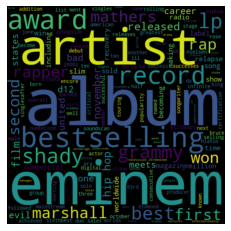

In [ ]:
# display the generated image
plt.imshow(person_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

The most commonly used words in the reference overview text appear to be:
cave, the reference's first and last names, flint, expedition, system, explorer, spot, tight, kentucky, explorer, known. 

It will be interesting to compare this wordcloud to the wordclouds in Step 2 for select NNs.

##5_PROCESSING (Fit and Assess the Model) - STEP 1

In this process step, the reference text needs to be vectorized by word count and frequency across all Wiki pages, transformed to a format the KNN algorithm can use, and run through the KNN model. This will identify the 10 NNs to the reference.

###5.1 Perform Bag of Words and TF-IDF on Reference Paragraph

For this task, I'll use two types of text representation -- Bag of Words (BoW) and TF-IDF -- on the dataset to prepare the text for further analysis and use in the KNN model.

BoW will count the number of times each word (term) is used in each 'text' cell of the dataframe and create a vector of the counts for each word. It then feeds that vector to Term Frequency-Inverse Document Frequency (TF-IDF) to transform term counts from each cell to term frequency across 'text' cells (or documents). The transformed data is what the KNN algorithm uses to identify nearest neighbors.

In [11]:
# perform BoW on the 'text' cell data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
vec = vectorizer.fit_transform(people_data['text'])

In [ ]:
print(vec.shape)

(42786, 437190)


In [12]:
# perform the TF-IDF transformation on the count vectors from BoW
tf_idf_vec = TfidfTransformer()
tf_idf_people = tf_idf_vec.fit_transform(vec)
tf_idf_people

<42786x437190 sparse matrix of type '<class 'numpy.float64'>'
	with 5847547 stored elements in Compressed Sparse Row format>

In [ ]:
print(type(tf_idf_people))

<class 'scipy.sparse.csr.csr_matrix'>


The data was successfully transformed and is ready to use with the KNN algorithm.

###5.2 Fit the k-Nearest Neighbors Model

In [13]:
# fit nearest neighbors with the TF-IDF transforms
nn_fit = NearestNeighbors().fit(tf_idf_people)

In [14]:
# verify the row index of the selected person (i.e., the reference)
people_data.iloc[index]

URI                  <http://dbpedia.org/resource/Eminem>
name                                               Eminem
text    marshall bruce mathers iii born october 17 197...
Name: 31657, dtype: object

In [15]:
# run the model to calculate nearest neighbors distances to the reference
nn_ref = tf_idf_people[index,:]     # the reference for the distances
distances, indices = nn_fit.kneighbors(nn_ref, n_neighbors = 11)   # 'nearest 10 people' excludes the reference

In [16]:
# display NN distances from the reference
distances

array([[0.        , 1.15405969, 1.23649465, 1.24666436, 1.24846074,
        1.24849862, 1.24931436, 1.25640304, 1.25948347, 1.26088656,
        1.26178261]])

In [17]:
# display the row indexes (indices) for the 10 NNs
indices

array([[31657, 24782, 15946, 17337, 26055, 34724, 35801, 24857, 35738,
         6946, 33007]])

Let's see who these folks are:

In [20]:
# display the names of the 10 nearest neighbors
for i in indices:
  nn_results = people_data['name'][i]
print(nn_results)

31657                        Eminem
24782                       50 Cent
15946                       Dr. Dre
17337                         Jay Z
26055    Andrea Bocelli discography
34724                        Lecrae
35801                    Joss Stone
24857                       Rihanna
35738                  Tommy Coster
6946                  Philip Atwell
33007                   Celine Dion
Name: name, dtype: object


In [ ]:
nn_results.shape

(11,)

These 10 people, who are displayed in order by distance (closest to farthest), will be the people searched in Wikipedia in Step 2.

##6_DATA VISUALIZATION - STEP 1

###6.1 Plot NNs to Show Distances

####6.1.1 Convert distances and indices to df

In [ ]:
distances

array([[0.        , 1.15405969, 1.23649465, 1.24666436, 1.24846074,
        1.24849862, 1.24931436, 1.25640304, 1.25948347, 1.26088656,
        1.26178261]])

In [ ]:
# change array to list
dist = distances.tolist()[0]
dist

[0.0,
 1.1540596886514616,
 1.2364946456765462,
 1.2466643634422738,
 1.248460742378491,
 1.248498622518745,
 1.249314359412136,
 1.2564030427072128,
 1.2594834700232278,
 1.2608865569120602,
 1.2617826090551276]

In [ ]:
# change list to dictionary to pandas df
dist_dict = {'distance': dist}
dist_df = pd.DataFrame(dist_dict)
dist_df

distance
0   0.000000
1   1.154060
2   1.236495
3   1.246664
4   1.248461
5   1.248499
6   1.249314
7   1.256403
8   1.259483
9   1.260887
10  1.261783

CREDIT for converting the arrays to dataframes: Jarrod Clark

In [ ]:
# change array to list
orig_idx = indices.tolist()[0]
orig_idx

[31657, 24782, 15946, 17337, 26055, 34724, 35801, 24857, 35738, 6946, 33007]

In [ ]:
# change list to dictionary to pandas df
idxs_dict = {'orig_idx': orig_idx}
idxs_df = pd.DataFrame(idxs_dict)
idxs_df

orig_idx
0      31657
1      24782
2      15946
3      17337
4      26055
5      34724
6      35801
7      24857
8      35738
9       6946
10     33007

####6.1.2 Create pandas df for plotting

In [ ]:
results = pd.DataFrame({'orig_idx': indices[0]})
names = []
text = []
for index in results['orig_idx']:
  names.append(people_data.at[index, 'name'])
  text.append(people_data.at[index, 'text'])      # this gets data out of a pandas df
results['name'] = names
results['orig_dist'] = distances.tolist()[0]
results['text'] = text
nn_all_df = results
nn_all_df

orig_idx  ...                                               text
0      31657  ...  marshall bruce mathers iii born october 17 197...
1      24782  ...  curtis james jackson iii born july 6 1975 bett...
2      15946  ...  andre romelle young born february 18 1965 know...
3      17337  ...  shawn corey carter born december 4 1969 known ...
4      26055  ...  the discography of italian pop tenor and cross...
5      34724  ...  lecrae devaughn moore mononymously known as le...
6      35801  ...  jocelyn eve stoker born 11 april 1987 better k...
7      24857  ...  robyn rihanna fenty born february 20 1988 know...
8      35738  ...  thomas joseph coster jr born june 10 1966 know...
9       6946  ...  philip g atwell often misspelled phillip g atw...
10     33007  ...  cline marie claudette dion cc oq chld din fren...

[11 rows x 4 columns]

In [ ]:
# plot barh for distances of 10 NNs to reference
fig = go.Figure()
fig = px.bar(nn_all_df, x='name', y='orig_dist')
fig.update_layout(title_text='Distance from Origin (Overviews)')
fig.update_xaxes(title_text='Person (Reference is 0,0)')    
fig.update_yaxes(title_text='Distance')    
fig.show()

This doesn't really tell us much either, except the distance between the reference and first NN is relatively large. Let's wordcloud the closest and farthest NNs to see if anything pops out.

###6.2 Wordclouds for Select NNs

NOTE: The rankings of the closest and farthest NNs to the reference are hardcoded so may not reflect the correct NNs for the chosen "test" person. 

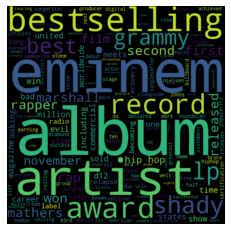

In [ ]:
# generate a wordcloud for the reference data (repeat of earlier)
ref_text = person_overview
person_wc = WordCloud(width = 600, height=600, min_font_size=6).generate(ref_text)
plt.imshow(person_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

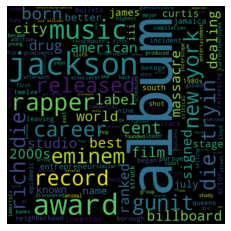

In [ ]:
# generate a wordcloud for the closest NN
closest_overview = nn_all_df['text'][1]
closest_wc = WordCloud(width = 600, height=600, min_font_size=6).generate(closest_overview)
plt.imshow(closest_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

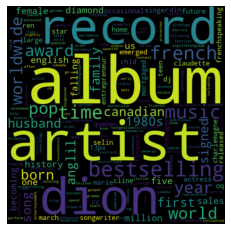

In [ ]:
# generate a wordcloud for the farthest NN
farthest_overview = nn_all_df['text'][10]
farthest_wc = WordCloud(width = 600, height=600, min_font_size=6).generate(farthest_overview)
plt.imshow(farthest_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

##7_COMMUNICATE RESULTS - STEP 1

In looking at the distances and the wordclouds (word frequency), it's not clear to me exactly what the KNN determinants are. For example, the word "cave" is used often in the reference (Crowther), closest (Farr) and furthest (Hamper) NNs, yet the only common word I find between the reference and furthest overviews is 'cave'. In fact, and as the bar chart makes clear, there really isn't anyone identified by the KNN algorithm in the 42,000+ paragraphs that's very close to the reference, and the closest is further from the reference (1.143236) than from the farthest (0.196068). You can see the commonalities just by looking at the wordclouds for Farr and Hamper, they're obviously much closer to each other than either is to Crowther. 

Likewise, the third closest NN to Patricia Crowther is Emlyn Crowther, the former drummer for the band Split Enz. Per his Wikipedia page and other research I did, it doesn't appear they are related in any known way other than by last name.

N.B. Interesting that the Wikipedia page of Crowther spends significant real estate discussing her marriage history and husband, while Farr's wife -- a well-known and highly respected caver and diver in her own right -- is not considered important enough to mention in his Wiki page. Although these pages were likely written by different people, it's still worth watching for *this* kind of bias in your data, as well. :

##8_DATA COLLECTION/SOURCES - STEP 2

###8.1 Roadmap for Step 2



STEP 2 - WIKIPEDIA API

1. Install Wikipedia API
1. Import Wikipediaapi

1. Pull out the page from Wikipedia for the selected famous person and store in a file in the `Student Folder - Susan > Projects > Project 4 - NLP > Data` folder.
1. Determine the sentiment analysis for the entire page.
1. Print out the entire article to screen.
1. Collect the Wikipedia pages for the 10 NNs in Step 1 (write a loop to extract the wiki page text for each of the 10 NNs in the same way I extracted the single wiki page text for my source person)
1. For the 'text' column cells in the 10 documents, write a loop to:
    * Replace '\n' with space; remove possessives, (), quotation marks, etc.
    * Replace any "forbidden" characters with '\char' (e.g., $) and RegEx.
    * Convert to a TextBlob
    * Perform Stop Word, Singularize or Lemmatize
    * Convert back to a string
    * Copy the string back to the dataframe
1. Perform the BoW CountVectorization on the 10 pages.
1. Perform the TF-IDF Transform on the 10 pages (2 steps!).
1. Fit NN on the Transformed Vector (TF-IDF) for the 10 NNs.
1. Print NLP distances from source (n_neighbors = 11).
1. Print names of those people and compare to Step 1 results.
1. Create vizualizations and write summary of analysis.
---


###8.2 Install and import Wikipedia API

In [ ]:
# install Wikipedia API
!pip3 install wikipedia-api

In [ ]:
import wikipediaapi

###8.3 Gather Data from Wikipedia for Person of Interest

In [ ]:
# pull out the reference's entire page from Wikipedia
topic = 'Patricia Crowther (caver)'
wikip = wikipediaapi.Wikipedia('en')
page_ex = wikip.page(topic)
wiki_text = page_ex.text
ref_wiki_text = wiki_text
ref_wiki_text

'Patricia ("Pat") P. Crowther (born 1943), later known as Patricia P. Wilcox, is an American cave explorer and cave surveyor active in the 1960s and early 1970s. She also worked as a computer programmer.Crowther was well-known among Kentucky cavers for her slight frame (she weighed 115 pounds) and her extreme dedication.  These two traits led her to pursue promising leads that other cavers were unwilling or unable to attempt. Of particular note is her traversal of a narrow canyon known as "The Tight Spot" in the portion of the Flint Ridge Cave System underlying Houchins Valley. The Tight Spot proved to be the critical juncture leading to the passages connecting Mammoth Cave and the Flint Ridge Cave System. Both Patricia Crowther and her then-husband Will Crowther, also a computer programmer, participated in many expeditions that attempted to connect the caves. She was part of the September 9, 1972 expedition that discovered and surveyed the historic final connection.\nCrowther earned a

Note that the Wikipedia API did not capture the References from the wiki page.

###8.4 Sentiment Analysis for Reference Wiki Page

##9_DATA CLEANING - STEP 2

All 10 Wiki pages will need new-line characters and most punctuation removed, singularity applied, and then brought into a dataframe as preparation for KNN fitting.

###9.1 Create a Working Dataframe

CREDIT for 'safe' reindexing code: https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column 

In [ ]:
# create pandas df with one column
nn_results_df = pd.DataFrame(nn_results.reset_index(level=0, inplace=False))
nn_results_df

index                        name
0   31657                      Eminem
1   24782                     50 Cent
2   15946                     Dr. Dre
3   17337                       Jay Z
4   26055  Andrea Bocelli discography
5   34724                      Lecrae
6   35801                  Joss Stone
7   24857                     Rihanna
8   35738                Tommy Coster
9    6946               Philip Atwell
10  33007                 Celine Dion

Calling the NNs' original row index number an index will be confusing (and incorrect), so let's rename it.

CREDIT for renaming column name code: https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas

In [ ]:
# rename 'index' to 'nn_row'
nn_results_df.columns = ['nn_row' if x=='index' else x for x in nn_results_df.columns]
nn_results_df

nn_row                        name
0    31657                      Eminem
1    24782                     50 Cent
2    15946                     Dr. Dre
3    17337                       Jay Z
4    26055  Andrea Bocelli discography
5    34724                      Lecrae
6    35801                  Joss Stone
7    24857                     Rihanna
8    35738                Tommy Coster
9     6946               Philip Atwell
10   33007                 Celine Dion

In [ ]:
# make a new df for Step 2
temp0 = nn_results_df

In [ ]:
# add 'text' column in which to store the extracted wiki text
nn_results_df['text'] = ''
nn_results_df

nn_row                        name text
0    31657                      Eminem     
1    24782                     50 Cent     
2    15946                     Dr. Dre     
3    17337                       Jay Z     
4    26055  Andrea Bocelli discography     
5    34724                      Lecrae     
6    35801                  Joss Stone     
7    24857                     Rihanna     
8    35738                Tommy Coster     
9     6946               Philip Atwell     
10   33007                 Celine Dion

###9.2 Extract Wikipedia Pages for Plotting (pre-cleaning)

In [ ]:
# create a df for Wiki page source data
nn_wiki_src = nn_results_df.copy()
for idx, name in enumerate(nn_wiki_src['name']):
  wikip = wikipediaapi.Wikipedia('en')
  page_ex = wikip.page(name)
  wiki_text = page_ex.text
  nn_wiki_src.at[idx,'text'] = wiki_text   # write the src text back to the df 'text' column

nn_wiki_src

nn_row  ...                                               text
0    31657  ...  Marshall Bruce Mathers III (born October 17, 1...
1    24782  ...  Curtis James Jackson III (born July 6, 1975), ...
2    15946  ...  Andre Romelle Young (born February 18, 1965), ...
3    17337  ...  Shawn Corey Carter (born December 4, 1969), kn...
4    26055  ...  Italian pop tenor and crossover artist Andrea ...
5    34724  ...  Lecrae Devaughn Moore (born October 9, 1979), ...
6    35801  ...  Joscelyn Eve Stoker (born 11 April 1987), know...
7    24857  ...  Robyn Rihanna Fenty (born February 20, 1988) (...
8    35738  ...  Thomas Joseph Coster Jr. (born June 10, 1966) ...
9     6946  ...  Philip G. Atwell is an American music video, t...
10   33007  ...  Céline Marie Claudette Dion  (, born 30 March ...

[11 rows x 3 columns]

To minimize resources, I tested and debugged the Wikipedia text extraction loop using one person before running it on all 10 NNs, and it worked. The data cleaning did a pretty good job, but some of the 'singularity' changes make certain things difficult to read or inaccurate (e.g., Patricia --> Patricium). There are also still a few periods in the text due to improper spacing in the source text. 

Now I'll run all wiki text thru the loop, CountVectorizer and TF-IDF transform as-is and see what happens.

###9.2 Extract and Clean Wikipedia Pages

CREDIT for code to run the Wiki page extraction and cleaning loop: Deep Dive DS Lecture and Jarrod Clark.

In [ ]:
# pull out the full page text from Wikipedia for the 10 NNs -- JARROD'S CODE
      # and clean it
# requires "import nltk" AND "nltk.download('punkt')"

for idx, name in enumerate(nn_results_df['name']) :
  wikip = wikipediaapi.Wikipedia('en')
  page_ex = wikip.page(name)
  wiki_text = page_ex.text
  wiki_strip = wiki_text.replace("\n", " ").replace("\'s", "").replace("\\", "").replace("(","").replace(")","").replace('"',"").replace(',','')
  wiki_blob = TextBlob(wiki_strip) # make a textblob so that we can singularize the word
  wiki_blob_singular = [x.singularize() for x in wiki_blob.words] # singularize each word in the textblob
  wiki_clean = ' '.join(wiki_blob_singular) # join it together into a single string
  nn_results_df.at[idx,'text'] = wiki_clean   # write the cleaned text back to the df 'text' column

nn_results_df

nn_row  ...                                               text
0    31657  ...  Marshall Bruce Mather IIus born October 17 197...
1    24782  ...  Curti Jame Jackson IIus born July 6 1975 known...
2    15946  ...  Andre Romelle Young born February 18 1965 know...
3    17337  ...  Shawn Corey Carter born December 4 1969 known ...
4    26055  ...  Italian pop tenor and crossover artist Andrea ...
5    34724  ...  Lecra Devaughn Moore born October 9 1979 monon...
6    35801  ...  Joscelyn Eve Stoker born 11 April 1987 known p...
7    24857  ...  Robyn Rihanna Fenty born February 20 1988 ree-...
8    35738  ...  Thoma Joseph Coster Jr born June 10 1966 is an...
9     6946  ...  Philip G Atwell is an American music video tel...
10   33007  ...  Céline Marie Claudette Dion born 30 March 1968...

[11 rows x 3 columns]

The loop worked and I see that the punctuation marks have been stripped, except for an occasional period that has no spaces or two spaces after it.

##10_EXPLORATORY DATA ANALYSIS (EDA) - STEP 2

###10.1 Sentiment Analysis for Wiki Pages



In [ ]:
# make a copy of the cleaned-up df
nn_wiki_clean = nn_results_df.copy()
nn_wiki_clean
type(nn_wiki_clean)

pandas.core.frame.DataFrame

In [ ]:
# calculate the sentiment of the 'text' column data
blob = TextBlob(ref_wiki_text)
blob.sentiment

Sentiment(polarity=0.03605442176870748, subjectivity=0.4177295918367347)

Reference: Patricia Crowther

|             | Polarity    | Subjectivity  |
| :---        |    :----:   |    :---:      |
| Description | 0.018       | 0.427         |
| Full Page   | 0.036       | 0.418   |


* Brief Description: Strongly neutral in polarity and a bit more objective than subjective

* Full Page: Double the polarity value (towards less neutral) of the brief description but still basically neutral, and a bit more objective than the brief description

####10.1.1 Sentiment Analysis for Select Wiki Pages



I want to compare the sentiment analyses of the people identified as closest and farthest from the reference.

####10.1.2 Closest distance to the reference

In [ ]:
# extract the identified row as a single dataframe
nn_wiki_pg1 = nn_wiki_clean.iloc[1]
nn_wiki_pg1

nn_row                                                24782
name                                                50 Cent
text      Curti Jame Jackson IIus born July 6 1975 known...
Name: 1, dtype: object

In [ ]:
# display the full-page cleaned text for resource
print(nn_wiki_pg1['text'])

Curti Jame Jackson IIus born July 6 1975 known professionally a 50 Cent is an American rapper actor and businessman Known for hi impact in the hip hop industry he ha been described a a master of the nuanced art of lyrical brevity.Born in the South Jamaica neighborhood of Queen Jackson began selling drug at age 12 during the 1980 crack epidemic He later began pursuing a musical career and in 2000 he produced Power of the Dollar for Columbium Record but day before the planned release he wa shot and the album wa never released In 2002 after 50 Cent released the compilation album Gues Who Back he wa discovered by Eminem and signed to Shady Record under the aegi of Dr Dre Aftermath Entertainment and Interscope Record With the aid of Eminem and Dr Dre who produced hi first major-label album Get Rich or Die Tryin 50 Cent became one of the world best selling rapper and rose to prominence a de facto leader of East Coast hip hop group G-Unit In 2003 he founded G-Unit Record signing hi G-Unit ass

In [ ]:
# calculate the sentiment of the 'text' column data
blob1 = TextBlob(nn_wiki_pg1['text'])
blob1.sentiment

Sentiment(polarity=0.0623216485411607, subjectivity=0.3832436601339042)

####10.1.3 Farthest distance identified from the reference (Wiki)

In [ ]:
# extract the identified row as a single dataframe
nn_wiki_pg8 = nn_wiki_clean.iloc[8]     # '8' because it's looking up by the orig_idx
nn_wiki_pg8                             #     but he's 10th w/ the Wiki KNN

nn_row                                                35738
name                                           Tommy Coster
text      Thoma Joseph Coster Jr born June 10 1966 is an...
Name: 8, dtype: object

In [ ]:
# display the full-page cleaned text for resource
print(nn_wiki_pg8['text'])

Thoma Joseph Coster Jr born June 10 1966 is an American keyboardist and composer He co-wrote hi first song titled Zulu with Carlo Santana in 1977 receiving hi first gold record the following year in 1978 In the following year he co-wrote and produced several jazz fusion album with hi father Tom Coster He ha composed music for UMG Warner Music Sony BMG Fox Searchlight Miramax The Weinstein Company Warner Brother Sony Picture Interscope Aftermath Def Jam AVEX He ha composed song with such artist a Dr Dre Eminem and 50 Cent In 2000 he co-wrote the single The Real Slim Shady with Eminem and Dr Dre Career In 1999 Tommy worked on variou project one of which being The Marshall Mather LP From 1999 to 2004 he performed on several record including The Marshall Mather LP Get Rich Or Die Tryin Devil Night War Peace Vol 2 The Peace Disc The Documentary Filmography Television 2011 to present In 2011 Coster wa involved in the soundtrack for South Africa first animation movie called Jock of The Bushve

In [ ]:
# calculate the sentiment of the 'text' column data
blob8 = TextBlob(nn_wiki_pg8['text'])
blob8.sentiment

Sentiment(polarity=0.06272321428571428, subjectivity=0.23058035714285716)

####10.1.4 Farthest distance identified from reference (overview, for consistent comparison)

In [ ]:
# extract the identified row as a single dataframe
nn_wiki_pg10 = nn_wiki_clean.iloc[10]       # '10' because it's looking up by the orig_idx
                                            #    but he's 8th w/ the Wiki KNN
nn_wiki_pg10

nn_row                                                33007
name                                            Celine Dion
text      Céline Marie Claudette Dion born 30 March 1968...
Name: 10, dtype: object

In [ ]:
# display the full-page cleaned text for resource
print(nn_wiki_pg10['text'])

Céline Marie Claudette Dion born 30 March 1968 is a Canadian singer She is noted for her powerful and technically skilled vocal Dion music ha incorporated genre such a pop rock R B gospel and classical music She is the best-selling Canadian recording artist the best-selling French language artist in history and the world best selling contemporary female artist of all time.Born into a large family from Charlemagne Quebec she emerged a a teen star in her home country with a series of French-language album during the 1980 She first gained international recognition by winning both the 1982 Yamaha World Popular Song Festival and the 1988 Eurovision Song Contest where she represented Switzerland After learning to speak English she signed on to Epic Record in the United State In 1990 Dion released her debut English-language album Unison establishing herself a a viable pop artist in North America and other English-speaking area of the world Her recording are mainly in French and English althou

In [ ]:
# calculate the sentiment of the 'text' column data
blob10 = TextBlob(nn_wiki_pg10['text'])
blob10.sentiment

Sentiment(polarity=0.16853847363826877, subjectivity=0.39478314588857116)

####10.1.5 Non-Nearest Neighbor Person
I also ran a comparison of someone from the original dataset who was not one of the identified 10 NNs to the reference, just to see how far away they are (Crowther was a caver, Rottensteiner was a science fiction writer (nn_row 3)).

In [ ]:
# pull out the entire page from Wikipedia for a test of sentiment scores
topic = 'Franz Rottensteiner'
wikip = wikipediaapi.Wikipedia('en')
page_ex = wikip.page(topic)
wiki_text3 = page_ex.text
rot3_wiki_text = wiki_text3
rot3_wiki_text

'Franz Rottensteiner (born 18 January 1942) is an Austrian publisher and critic in the fields of science fiction and speculative fiction in  general.\n\nBiography\nRottensteiner was born in Waidmannsfeld, Lower Austria.\nHe studied journalism, English and history at the University of Vienna, receiving his doctorate in 1969.  He served about fifteen years as librarian and editor at the  Österreichisches Institut für Bauforschung in Vienna.  In addition, he produced a number of translations into German of leading science fiction authors, including Herbert W. Franke, Stanislaw Lem, Philip K. Dick, Abe Kōbō, Cordwainer Smith, Brian W. Aldiss and  the Strugatski brothers.\nIn 1973 his anthology of science fiction View From Another Shore, published in the US  by Seabury Press, introduced a number of European authors to the English-reading public.  Selected authors included Stanislaw Lem, Josef Nesvadba, Gerard Klein, Lino Aldani and Jean-Pierre Andrevon.\nThe year 1975 saw the start of his s

In [ ]:
# pull non-NN comparison person Wiki page and clean

name = 'Franz Rottensteiner'
wikip = wikipediaapi.Wikipedia('en')
page_ex = wikip.page(name)
rot3_wiki_text = page_ex.text
rot3_wiki_strip = rot3_wiki_text.replace("\n", " ").replace("\'s", "").replace("\\", "").replace("(","").replace(")","").replace('"',"").replace(',','')
rot3_wiki_blob = TextBlob(rot3_wiki_strip) # make a textblob so that we can singularize the word
rot3_wiki_blob_singular = [x.singularize() for x in rot3_wiki_blob.words] # singularize each word in the textblob
rot3_wiki_clean = ' '.join(rot3_wiki_blob_singular) # join words back together into a single string
rot3_full_df = rot3_wiki_clean   # REMOVED idx from [idx, 'text] for no loop; # write the cleaned text back to the df 'text' column
rot3_full_df


'Franz Rottensteiner born 18 January 1942 is an Austrian publisher and critic in the field of science fiction and speculative fiction in general Biography Rottensteiner wa born in Waidmannsfeld Lower Austrium He studied journalism English and history at the University of Vienna receiving hi doctorate in 1969 He served about fifteen year a librarian and editor at the Österreichisch Institut für Bauforschung in Vienna In addition he produced a number of translation into German of leading science fiction author including Herbert W Franke Stanislaw Lem Philip K Dick Abe Kōbō Cordwainer Smith Brian W Aldis and the Strugatski brother In 1973 hi anthology of science fiction View From Another Shore published in the U by Seabury Pres introduced a number of European author to the English-reading public Selected author included Stanislaw Lem Josef Nesvadba Gerard Klein Lino Aldani and Jean-Pierre Andrevon The year 1975 saw the start of hi series Die phantastischen Romane For seven year it re-publ

In [ ]:
# calculate the sentiment of the non-NN Wiki page
rot3_blob = TextBlob(rot3_full_df)
rot3_blob.sentiment

Sentiment(polarity=0.08076544667453758, subjectivity=0.31784730421094054)

####10.1.6 Sentiment analysis results



Reference: Patricia Crowther

|         | 10 NN Rank | Polarity | Subjectivity |
| :---    | :---:  |  :----:  |  :---:    |
| Patricia Crowther | 0 | 0.036       | 0.418         |
| Martyn Farr | 1 | 0.137       | 0.368   |
| Albert Raney | 10 | -0.006 | 0.288 |
| Ben Hamper | 8 | 0.101       | 0.340   |
| Franz Rottensteiner | N/A | 0.081       | 0.318   |
<br>


Although there is a slight trend in Subjectivity (Rottensteiner is the least of the four and so "furthest" in subjectivity from Crowther), there does not appear to be a strong correlation between NN distance and polarity or subjectivity. I think the non-NN comparison generally supports that.

###10.2 Wordclouds for Wiki Pages

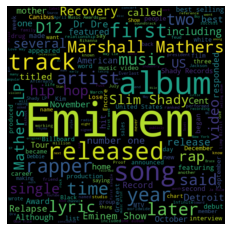

In [ ]:
# generate a wordcloud for the reference Wiki page
ref_text = nn_wiki_src['text'][0]
person_wc = WordCloud(width = 600, height=600, min_font_size=6).generate(ref_text)
plt.imshow(person_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

The most commonly used words in the reference overview text appear to be:
Cave, Crowther, System, expedition, Mammoth, Flint Ridge, Pat, Patricia, connect, known, cavers, married and Tight. 

Many of these words are in common with those in Step one, although in many cases the frequency (importance) changed.

##11_PROCESSING - STEP 2

As with the single reference person, I'll run all 10 Wiki pages (stored in ??) through the Count Vectorizer and TF-IDF and apply the outputs to the KNN algorithm. This will let me compare distance results from the brief descriptions and the full Wiki pages to see how close they are. 

In [ ]:
# make a copy of the df
#nn_wiki_xform = nn_results_df.copy()
wiki_xform = nn_wiki_clean.copy()

In [ ]:
type(wiki_xform['text'][0])

str

In [ ]:
# display the df
wiki_xform

nn_row  ...                                               text
0    31657  ...  Marshall Bruce Mather IIus born October 17 197...
1    24782  ...  Curti Jame Jackson IIus born July 6 1975 known...
2    15946  ...  Andre Romelle Young born February 18 1965 know...
3    17337  ...  Shawn Corey Carter born December 4 1969 known ...
4    26055  ...  Italian pop tenor and crossover artist Andrea ...
5    34724  ...  Lecra Devaughn Moore born October 9 1979 monon...
6    35801  ...  Joscelyn Eve Stoker born 11 April 1987 known p...
7    24857  ...  Robyn Rihanna Fenty born February 20 1988 ree-...
8    35738  ...  Thoma Joseph Coster Jr born June 10 1966 is an...
9     6946  ...  Philip G Atwell is an American music video tel...
10   33007  ...  Céline Marie Claudette Dion born 30 March 1968...

[11 rows x 3 columns]

You can see in Patricia Crowther's text that the vectorization and transform actually changed her first name to Patricium. Changes like this would definitely affect word count, weighting and other factors that contribute to the nearest-neighbor algorithm.

###11.1 Perform Bag of Words and TF-IDF on Wiki Pages

In [ ]:
# perform BoW on the 'text' cell data using CountVectorizer -- LOOP??

vectorizer = CountVectorizer(stop_words='english')
wiki_vec = vectorizer.fit_transform(wiki_xform['text'])
tf_idf_vec = TfidfTransformer()
tf_idf_wiki = tf_idf_vec.fit_transform(wiki_vec)    # perform TF-IDF xform on count vectors from BoW
#wiki_xform['text'] = tf_idf_wiki   # writes transformed text back to the df 'text' column
tf_idf_wiki

<11x7870 sparse matrix of type '<class 'numpy.float64'>'
	with 16233 stored elements in Compressed Sparse Row format>

In [ ]:
print(rot3_wiki_blob)

Franz Rottensteiner born 18 January 1942 is an Austrian publisher and critic in the fields of science fiction and speculative fiction in  general.  Biography Rottensteiner was born in Waidmannsfeld Lower Austria. He studied journalism English and history at the University of Vienna receiving his doctorate in 1969.  He served about fifteen years as librarian and editor at the  Österreichisches Institut für Bauforschung in Vienna.  In addition he produced a number of translations into German of leading science fiction authors including Herbert W. Franke Stanislaw Lem Philip K. Dick Abe Kōbō Cordwainer Smith Brian W. Aldiss and  the Strugatski brothers. In 1973 his anthology of science fiction View From Another Shore published in the US  by Seabury Press introduced a number of European authors to the English-reading public.  Selected authors included Stanislaw Lem Josef Nesvadba Gerard Klein Lino Aldani and Jean-Pierre Andrevon. The year 1975 saw the start of his series Die phantastischen

In [ ]:
tf_idf_wiki.shape

(11, 7870)

The data was successfully transformed and is ready to use with the KNN algorithm.

###11.2 Fit the k-Nearest Neighbors Model

In [ ]:
# fit nearest neighbors with the TF-IDF transforms
nn_wiki_fit = NearestNeighbors().fit(tf_idf_wiki)

In [ ]:
# run the model to calculate nearest neighbors (NLP) distances to the reference
distances_wiki, indices_wiki = nn_wiki_fit.kneighbors(tf_idf_wiki[0,:], n_neighbors=11)   # 'nearest 10 people' excludes the reference
print(distances_wiki)
print(indices_wiki)

[[0.         1.08432184 1.10187937 1.13003929 1.13676314 1.18779509
  1.19830286 1.20184396 1.21028529 1.23133101 1.24294462]]
[[ 0  1  2  3  9  6  7  8 10  4  5]]


In [ ]:
# change array to list
dist2 = distances_wiki.tolist()[0]
dist2

[0.0,
 1.0843218362001266,
 1.1018793697841227,
 1.1300392900841305,
 1.1367631438398975,
 1.1877950914839701,
 1.1983028633378103,
 1.2018439576418785,
 1.2102852919398701,
 1.2313310121108534,
 1.2429446208762573]

In [ ]:
# change list to dictionary to pandas df
dist2_dict = {'wiki_distance': dist2}
dist2_df = pd.DataFrame(dist2_dict)
dist2_df

wiki_distance
0        0.000000
1        1.084322
2        1.101879
3        1.130039
4        1.136763
5        1.187795
6        1.198303
7        1.201844
8        1.210285
9        1.231331
10       1.242945

In [ ]:
# change array to list
wiki_idx = indices_wiki.tolist()[0]
wiki_idx

[0, 1, 2, 3, 9, 6, 7, 8, 10, 4, 5]

In [ ]:
# change list to dictionary to pandas df
wiki_idx_dict = {'wiki_rank': wiki_idx}
wiki_idx_df = pd.DataFrame(wiki_idx_dict)
wiki_rank = wiki_idx_df
wiki_rank

wiki_rank
0           0
1           1
2           2
3           3
4           9
5           6
6           7
7           8
8          10
9           4
10          5

###11.3 Analysis of Processing

Let's look at the KNN results for overviews vs. Wiki pages.

In [ ]:
# create a df with name and idx, distance and distance rank for 
# overviews and Wiki pages
temp0
temp3 = temp0.drop('text', axis=1)
temp3.columns = ['orig_idx' if x=='nn_row' else x for x in temp3.columns]
temp3['orig_rank'] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
temp4 = temp3.join(dist_df)
temp5 = temp4.join(wiki_rank)
temp6 = temp5.join(dist2_df)
temp6.columns = ['orig_dist'if x=='distance' else x for x in temp6.columns]
temp6.columns = ['wiki_dist'if x=='wiki_distance' else x for x in temp6.columns]
wiki_plot_df = temp6
wiki_plot_df

orig_idx                        name  ...  wiki_rank  wiki_dist
0      31657                      Eminem  ...          0   0.000000
1      24782                     50 Cent  ...          1   1.084322
2      15946                     Dr. Dre  ...          2   1.101879
3      17337                       Jay Z  ...          3   1.130039
4      26055  Andrea Bocelli discography  ...          9   1.136763
5      34724                      Lecrae  ...          6   1.187795
6      35801                  Joss Stone  ...          7   1.198303
7      24857                     Rihanna  ...          8   1.201844
8      35738                Tommy Coster  ...         10   1.210285
9       6946               Philip Atwell  ...          4   1.231331
10     33007                 Celine Dion  ...          5   1.242945

[11 rows x 6 columns]

I notice all rankings changed except for 1 and 9 between overviews and Wiki pages. Most pages had a lot more words than the overview paragraphs, which provides longer word vectors (more "data points") to work with.

Although the distance between Martyn Farr and Crowther increased slightly (0.125117), Farr is still the closest NN to Crowther by a large margin. His ranking could have changed depending on the thoroughness and type of information included in the Wiki pages, but it didn't. 

The largest distance change was from #6 to #2 by Nuno Gomes (diver) (-0.051012). Based on the EDA, ranking results between the paragraphs and pages, the distance between Crowther and Farr (closest), and examining select wordclouds for common words, there do not appear to be many people like Patricia Crowther in the 42,000+ people in this dataset.

To be consistent, I'll run a sentiment analysis on Albert Raney, who is the farthest neighbor based on Wiki page word frequency (and cleaning).

In [ ]:
# calculate the sentiment of the 'text' column data for the Wiki farthest NN
blob10a = TextBlob(nn_wiki_pg10['text'][8])
blob10a.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

##12_DATA VIZUALIZATION - STEP 2

###12.1 Plot Polarity

Let's plot the polarity of the four Wiki pages.

In [ ]:
# create a df with name, polarity and subjectivity
d = {'Name': ['Patricia Crowther', 'Martyn Farr', 'Ben Hamper', 'Albert Raney'], 'Polarity': [0.036, 0.137, 0.101, -0.006], 'Subjectivity': [0.418, 0.368, 0.340, 0.288]}
sent = pd.DataFrame(data=d)
sent

Name  Polarity  Subjectivity
0  Patricia Crowther     0.036         0.418
1        Martyn Farr     0.137         0.368
2         Ben Hamper     0.101         0.340
3       Albert Raney    -0.006         0.288

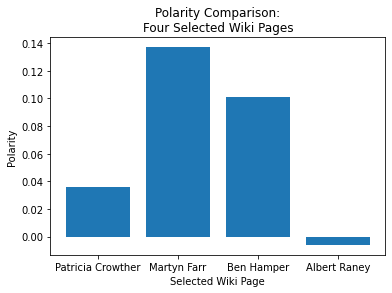

In [ ]:
# plot a bar chart of polarities of the four selected texts

plt.bar(sent['Name'],sent['Polarity'])
plt.xlabel('Selected Wiki Page')
plt.ylabel('Polarity')
plt.title('Polarity Comparison:\nFour Selected Wiki Pages')
plt.show()

Again, there is not a clear correlation between the Polarity and whether or not a Wiki page (person) will be a nearest neighbor.

###12.2 Plot Subjectivity

Let's try plotting the subjectivity of the four Wiki pages.

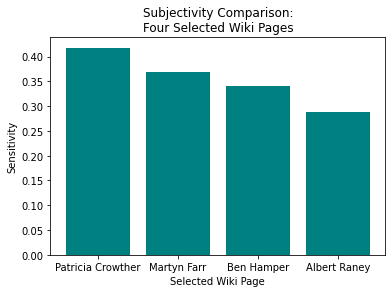

In [ ]:
# plot a bar chart of subjectivities of the four selected texts

plt.bar(sent['Name'],sent['Subjectivity'],color='teal')
plt.xlabel('Selected Wiki Page')
plt.ylabel('Sensitivity')
plt.title('Subjectivity Comparison:\nFour Selected Wiki Pages')
plt.show()

There is a clear trend in subjectivity, but that does not seem to be a factor in determining distance to the reference.

###12.3 Wordclouds to Identify Commonalities among Select NN Pages

Wordclouds of the closest and farthest NNs for Wiki pages might show commonalities at a glance that help explain the changes in rank. Wordclouds for the reference (Crowther) and Farr are repeated here for review.

NOTE: These should be in a subplots layout to compare before and after, I  couldn't get it to work.

####12.3.1 Wordclouds for the reference

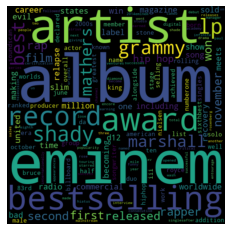

In [ ]:
# generate a wordcloud for Crowther's overview (repeated from Step 1)
ref_text = person_overview
person_wc = WordCloud(width = 600, height=600, min_font_size=8).generate(ref_text)
plt.imshow(person_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

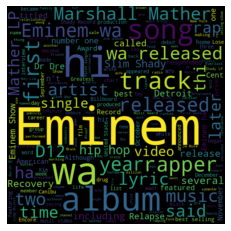

In [ ]:
# generate a wordcloud for Crowther's Wiki page
ref_wiki = wiki_xform['text'][0]
ref_wiki_wc = WordCloud(width = 600, height=600, min_font_size=8).generate(ref_wiki)
plt.imshow(ref_wiki_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

####12.3.2 Wordclouds for the Closest NN

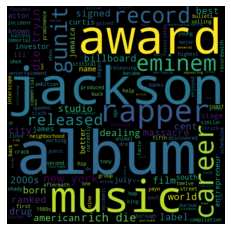

In [ ]:
# generate a wordcloud for Farr's NN overview
# Martyn Farr
closest_overview = nn_all_df['text'][1]
closest_wc = WordCloud(width = 600, height=600, min_font_size=8).generate(closest_overview)
plt.imshow(closest_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

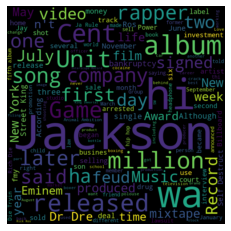

In [ ]:
# generate a wordcloud for Farr's NN Wiki page
# Martyn Farr
closest_wiki = wiki_xform['text'][1]
closest_wiki_wc = WordCloud(width = 600, height=600, min_font_size=8).generate(closest_wiki)
plt.imshow(closest_wiki_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

####12.3.3 Wordclouds for the farthest NN for overviews

The farthest NN identified for the overviews analysis was Ben Hamper. His wordclouds for both overview and Wiki page are included to show how they changed and so, how his rank changed from 10 to 8 as more data points were added.

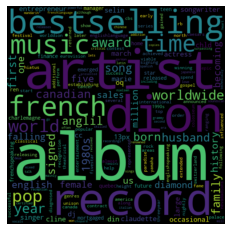

In [ ]:
# generate a wordcloud for Hamper's NN overview
farthest_overview = nn_all_df['text'][10]
farthest_wc = WordCloud(width = 600, height=600, min_font_size=8).generate(farthest_overview)
plt.imshow(farthest_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

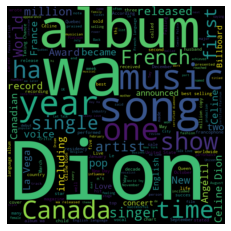

In [ ]:
# generate a wordcloud for Hamper's NN Wiki page
far8_wiki = wiki_xform['text'][10]
far8_wiki_wc = WordCloud(width = 600, height=600, min_font_size=8).generate(far8_wiki)
plt.imshow(far8_wiki_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

####12.3.4 Wordclouds for the farthest NN for Wiki pages

The farthest NN identified from the Wiki pages analysis was Albert Raney. His wordclouds for both overview and Wiki page are included to show how they changed and so, how his rank also changed from 8 to 10 as more data points were added..

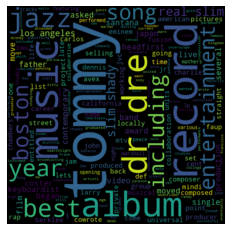

In [ ]:
# generate a wordcloud for Raney's NN overview
far8_overview = nn_all_df['text'][8]
far8_wc = WordCloud(width = 600, height=600, min_font_size=8).generate(far8_overview)
plt.imshow(far8_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

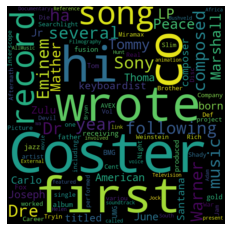

In [ ]:
# generate a wordcloud for Raney's NN Wiki page
farthest_wiki = wiki_xform['text'][8]
farthest_wiki_wc = WordCloud(width = 600, height=600, min_font_size=8).generate(farthest_wiki)
plt.imshow(farthest_wiki_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

###12.4 Visualization Analysis

In comparing the wordclouds of the paragraph overviews to the full Wikipedia pages (minus content in sidebars and the References section), a few things have come to mind:

* At the risk of stating the obvious, content matters. As does writing style, upkeep of the content, and the intent of the person(s) writing that content. These 11 Wiki pages were most surely written by different people, and the "important" words that are revealed through the wordclouds indicate different emphasis on events, accomplishments and life history. 

* One factor that may have affected the Wiki page wordclouds is that I had to use text that either had been "stop worded" and singularized or that had not been cleaned. Since I wanted to avoid skewing the analysis towards stop words ('an', 'the', etc.), I chose the cleaned-up versions of text. The singularization did a number on some of those words -- for example, in Alber Raney's Wiki wordcloud, the so-called word 'wa' was used as frequently as 'cave', but 'wa' is singular for 'was' and has virtually no importance for a KNN model. So I imagine that had some impact on the end result but, again, the reference text (person) was so distant from its nearest neighbor that I doubt anything would have changed without singularity.

* The three common words that jump out across these four peoples' texts are 'cave', 'cave diving' and 'flint' (or 'Flint'). However, as we used the KNN algorithm, CountVectorizer and TF-IDF algorithm and techniques, there was no context involved, only word frequency. So Crowther's 'flint' is Flint Ridge where she *traversed* a nortoriously narrow canyon and connected two huge cave systems, and Hamper's 'flint' is Flint, Michigan' where he lived and worked in film, video and radio. In reading his Wiki page, I also noticed that the radio station that played his collection of music was in *Traverse*, Michigan so there's another word in common that may have linked these two people.

##13_COMMUNICATION

The k-Nearest Neighbors (KNN) algorithm is based on an assumption that data points will be in (somewhat) close proximity to each other, usually falling into one or more groups or clusters. In this project, I learned how to use sentiment analysis and KNN to identify the 10 nearest neighbors (in an NLP sense) to that person based on sentiment analysis and word frequency within and across shorter (DBpedia) and longer (Wikipedia) text sources for the reference and the NNs.

My reference person, or center point of data (a person chosen from the DBpedia list), was Patricia "Pat" Crowther, who was a noted caver and explorer and who traversed some of the most difficult caving passes known in her time. Both paragraph and Wiki page text sources were very neutral in polarity (0.018 and 0.036) and a bit more objectively (0.427 and 0.418) than subjectively written. 

Through data cleaning, vectorizing, running the KNN model, and visualizing and analyzing the data and results, it was interesting that the closest neighbor to Crowther is not really very close. In fact, the closest neighbor, Martyn Farr, is more than 80% closer to the furthest neighbor than he is to Crowther, regardless of the text source. 



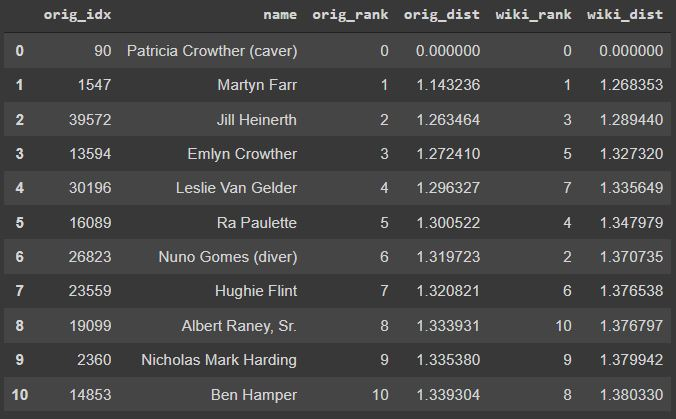

In [ ]:
from IPython.display import Image
Image('//drive/MyDrive/Student Folder - Susan/Projects/Project 4 - NLP/Data/wiki_plot_df_conclusion.JPG')

The bar plots I used in EDA and post-processing analysis bore this out but weren't much more helpful than that. The wordclouds were a bit more useful for seeing what some of the commonalities are between Crowther and select other NNs, but that is a manual rather than scientific method of analyzing and it did not provide me with a clear understanding or even hypothesis about why Crowther is so far from her 10 NNs but they are all very close to each other. The most obvious commonality among most of the NNs was the word 'cave' or 'Cave', but that's not much to go on. I suspect a partial reason is that not many women have been recognized until relatively recently as cavers so, at least among these 42,000+ paragraphs and Wiki pages, there's just very little to compare her to other than a relationship to a cave or caving.

The resulting rank changes from processing the Wiki page text source indicate that the more data pts (words) available to model, the better the possibility of getting more and/or better clusters (common words or, maybe for another algorithm, even synonyms of the words). With more clusters, a fuller picture of the information the data gives us. In this case, the Wikipedia page source usually offered more data points (words) than the brief paragraphs from DBpedia, and this made a difference in the rankings of several of my 10 NNs (some moved closer, some farther away). In either case, Farr was still the closest neighbor to Crowther though in neither of his wordclouds could I find a clear reason why.

For this reason, I'm wondering if I didn't use the best plots to make better discoveries about *why* Farr was closer to Crowther than, say, Ben Hamper or Albert Raney (the farthest neighbors for paragraph and Wiki source, respectively). It went beyond her last name, though, because otherwise Emlyn Crowther (no apparent relation) would have been closer or closest to her.

##14_NEXT STEPS



* Identify additional EDA and Visualization plots/techniques to scientifically determine (if possible) why KNN identified those 10 NNs.

* Determine if DBSCAN would've been helpful in identifying NNs or validating the KNN NNs and, if so, run it as well.

* Plot the wordclouds as subplots so they're closer together for comparison.

* Scatter plot the reference as origin/center and the 10 NNs as points at applicable distance from it for both the overview paragraph and full Wiki page to compare differences.

* Recode the sentiment analysis to look up the wiki_rank instead of hard-coding the wiki rank numbers.

* I found some code on Medium that's related to this project (generally), which uses the CountVectorizer results to print a list of the top user-specified number of words and their counts. I'd like to run that on these texts after they are de-punctuated and stop-worded (but not singularized!) to see what the common words actually are (besides just looking at wordclouds).